## Observations and Insights 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Checking the number of mice.
combine_data_df["Mouse ID"].value_counts()


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combine_data_df[combine_data_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [67]:
combine_data_df[combine_data_df.duplicated(['Mouse ID'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combine_data_df.drop_duplicates(subset=['Mouse ID', "Timepoint"])
cleaned_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_df['Mouse ID'].value_counts()

k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = cleaned_data_df.groupby("Drug Regimen"). mean()["Tumor Volume (mm3)"]
regimen_median = cleaned_data_df.groupby("Drug Regimen"). median()["Tumor Volume (mm3)"]
regimen_variance = cleaned_data_df.groupby("Drug Regimen"). var()["Tumor Volume (mm3)"]
regimen_stdev = cleaned_data_df.groupby("Drug Regimen"). std()["Tumor Volume (mm3)"]
regimen_sem = cleaned_data_df.groupby("Drug Regimen"). sem()["Tumor Volume (mm3)"]



In [71]:
# Assemble the resulting series into a single summary dataframe.
summary_results = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, 
                               "Standard Deviation": regimen_stdev, "SEM": regimen_sem})
summary_results

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_results2= cleaned_data_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_results2 = summary_results2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})
summary_results2

C:\Users\tashu\AppData\Local\Temp\ipykernel_37836\1483177578.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_results2= cleaned_data_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

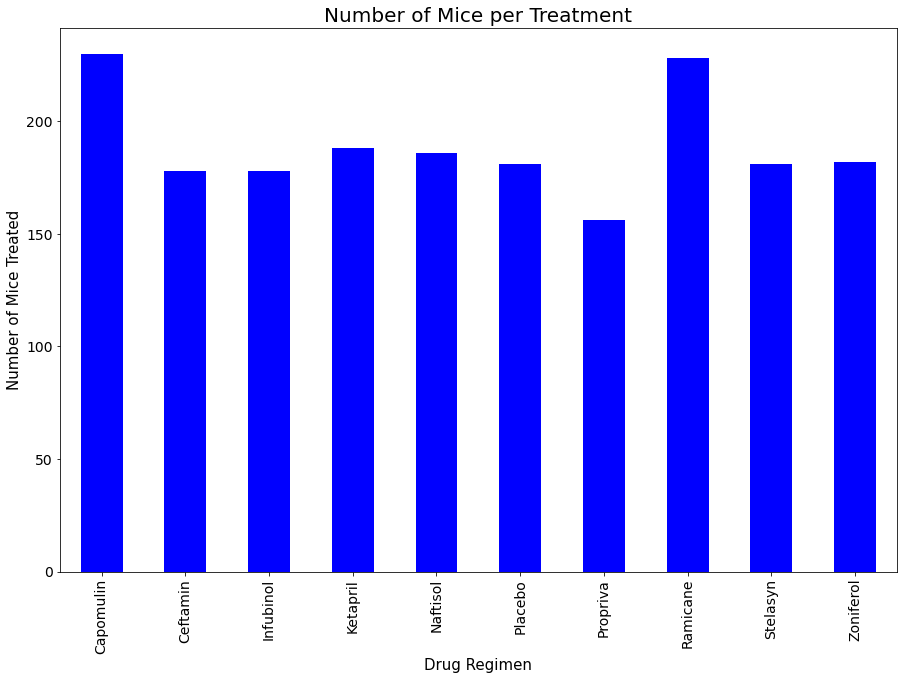

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<Figure size 432x288 with 0 Axes>

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = cleaned_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_plot = mice_tested.plot(kind="bar", color='b', figsize=(15,10), fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)


plt.show()
plt.tight_layout()

# mice_count
mice_tested


[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

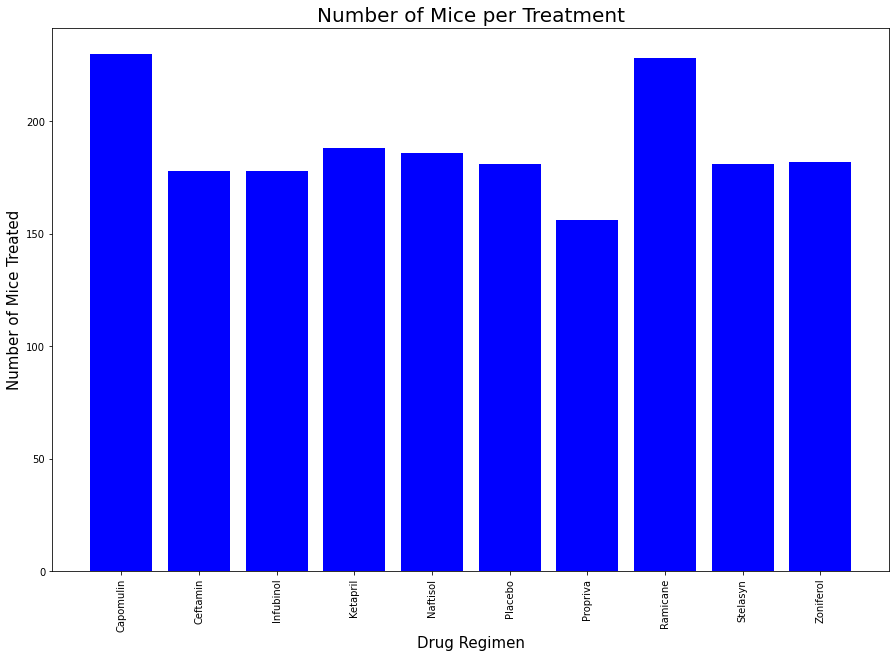

In [76]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_timep = (cleaned_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_timep

x_axis = np.arange(len(mice_tested))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.xticks(tick_locations, mice_tested.index.values, rotation="vertical")
plt.bar(x_axis, mice_timep, color='b', alpha=1, align="edge")
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)


mice_timep

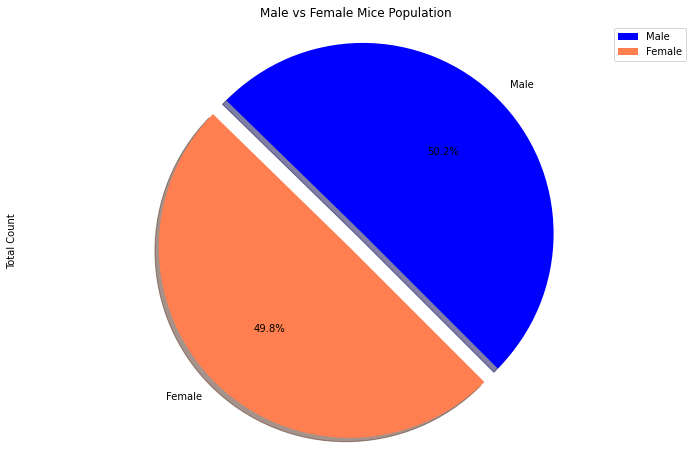

,Total Count
Male,125
Female,124


In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Total count of mice based on gender

gender_dist = cleaned_data_df.loc[:, ["Sex", "Mouse ID"]]
gender_dist = gender_dist.drop_duplicates()
mice_count = gender_dist["Sex"].value_counts()

# Create a dataframe for count and percentage of male and female mice
mice_breakdown = pd.DataFrame({"Total Count": mice_count})

# Generate a pie plot showing the distribution of female versus male mice
colors = ["blue", "coral"]
explode = (0.1, 0)
pandas_pie = mice_breakdown.plot(kind="pie", figsize=(12,8), colors=colors, y="Total Count", title="Male vs Female Mice Population",
                              startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")

plt.show()

mice_breakdown


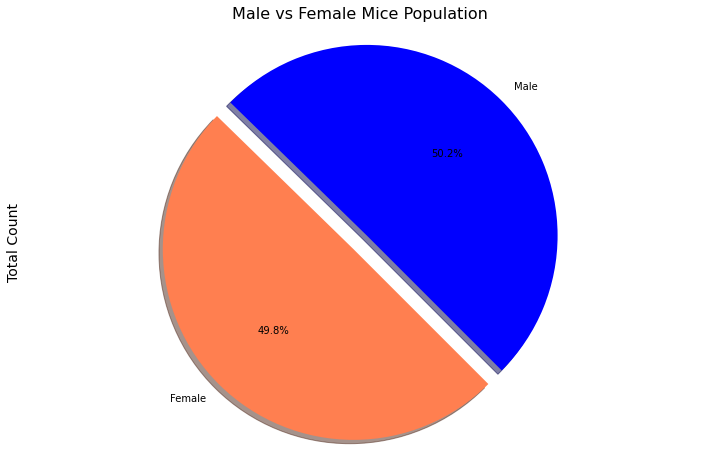

,Total Count
Male,125
Female,124


In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_dist = cleaned_data_df.loc[:, ["Sex", "Mouse ID"]]
gender_dist = gender_dist.drop_duplicates()
mice_count = gender_dist["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "coral"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Male vs Female Mice Population",fontsize = 16)
plt.ylabel("Total Count",fontsize = 14)
plt.pie(mice_count, labels=labels, colors=colors, startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")

#Set equal axis
plt.axis("equal")

plt.show()

mice_breakdown

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_last = last_timepoint.merge(cleaned_data_df, on=["Mouse ID", "Timepoint"], how="left")
merged_data_last

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes_total = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    tumor_volumes = merged_data_last.loc[merged_data_last["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
  
    tumor_volumes_total.append(tumor_volumes) 
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")  

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


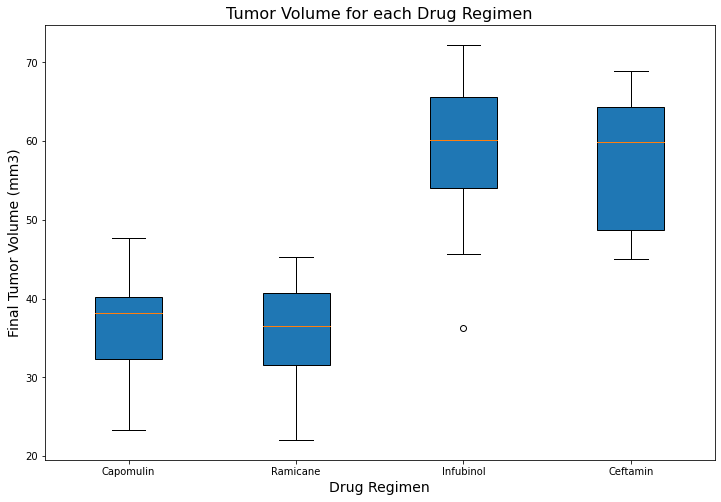

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumor_volumes_total, labels=treatments, widths = 0.4, patch_artist=True,vert=True)
plt.show()

## Line and Scatter Plots

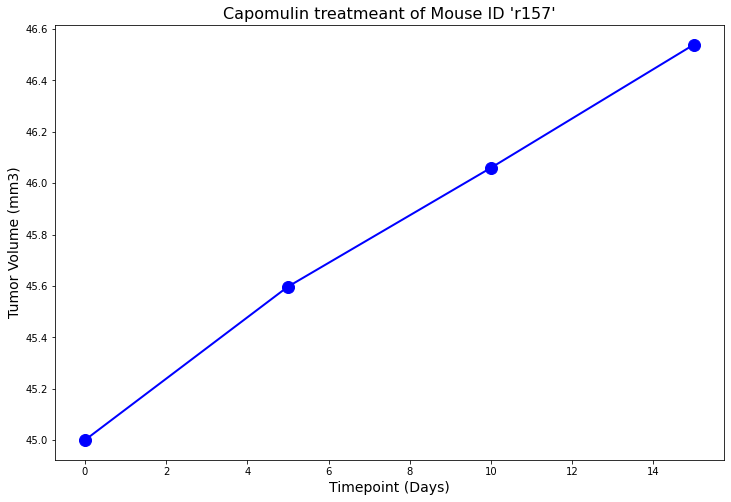

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Capomulin",:]
capomulin_df


mouse_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "r157",:]
mouse_capomulin


x_axis = mouse_capomulin["Timepoint"]
tumor_volume = mouse_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin treatmeant of Mouse ID 'r157'",fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12,marker="o",color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)


plt.show()


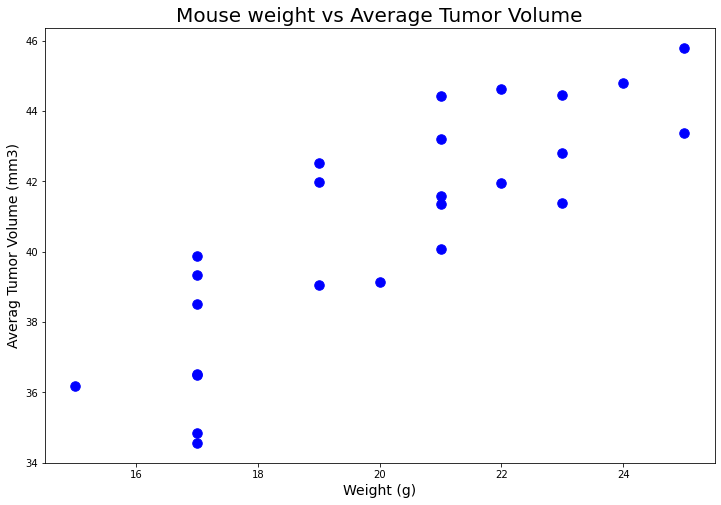

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_capom = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size=14
plt.scatter(average_capom ['Weight (g)'],average_capom ['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =14)


plt.show()

average_capom.head()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


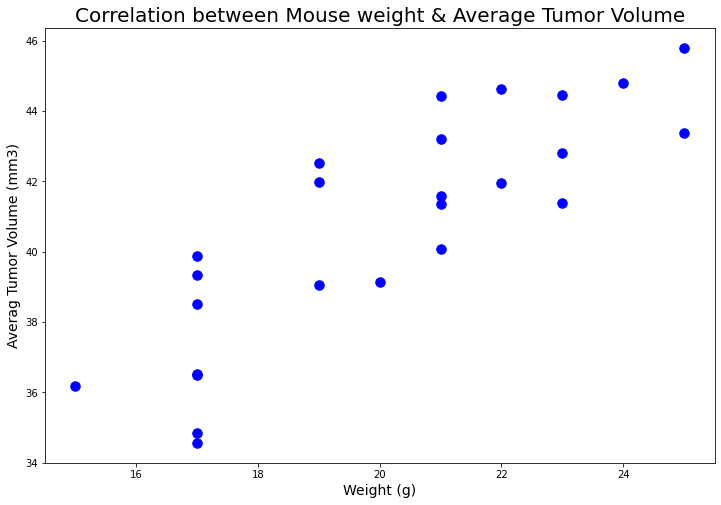

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(average_capom['Weight (g)'],average_capom['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(average_capom['Weight (g)'],average_capom['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Correlation between Mouse weight & Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 14)

plt.show()

y = 0.95x + 21.55


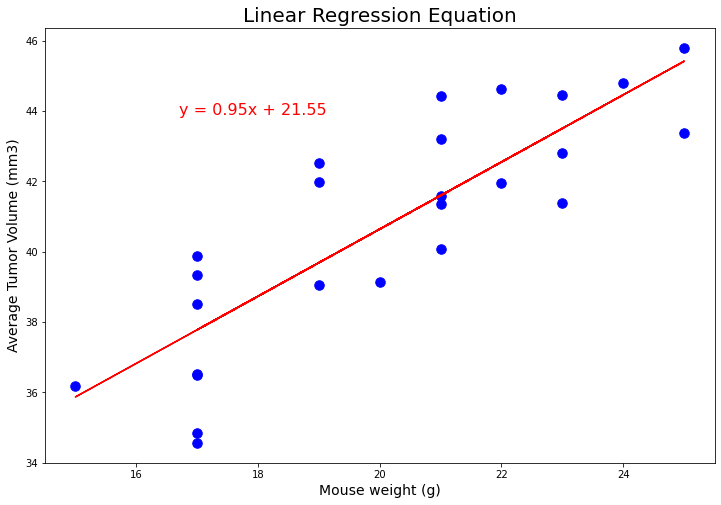

In [55]:
# Add the linear regression equation and line to the scatter plot
x_values = average_capom['Weight (g)']
y_values = average_capom['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(x_values,y_values, s=90, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Equation", fontsize=20)
plt.xlabel("Mouse weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="red")


plt.show()